<a href="https://colab.research.google.com/github/samsharm/Python/blob/master/Time_Series_Analysis_Avi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Numerical Data Distribution**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Identification & Handling of Missing Data**](#Section51)<br>
  - **5.2** [**Identification & Handling of Redundant Data**](#Section52)<br>
  - **5.3** [**Identification & Handling of Inconsistent Data Types**](#Section53)<br>

**6.** [**Time Series Analysis**](#Section6)<br>
  - **6.1** [**Decomposition of Time Series**](#Section61)<br>
  - **6.2** [**Analysis of Stationarity**](#Section62)<br>
  - **6.3** [**Data Transformations**](#Section63)<br>
    - **6.3.1** [**Log Scaled Transformation**](#Section631)<br>
    - **6.3.2** [**Log Scaled Moving Average Transformation**](#Section632)<br>
    - **6.3.3** [**Exponential Weighted Average Transformation**](#Section633)<br>
    - **6.3.4** [**Log Scaled Exponential Weighted Average Transformation**](#Section634)<br>
    - **6.3.5** [**Time Shift Transformation**](#Section635)<br>

**7.** [**Time Series Forecasting**](#Section7)<br>
  - **7.1** [**Auto Correlation & Partial Auto Correlation**](#Section71)<br>
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Model Development**](#Section73)<br>
    - **7.3.1** [**Auto Regressive Model**](#Section731)<br>
    - **7.3.2** [**Moving Average Model**](#Section732)<br>
    - **7.3.3** [**Auto Regressive Moving Average Model**](#Section733)<br>
    - **7.3.4** [**Auto Regressive Integrated Moving Average Model**](#Section734)<br>
    - **7.3.5** [**Reverse Transformation & Prediction Analysis**](#Section735)<br>

**8.** [**Conclusion**](#Section8)<br>


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
%%time
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 3.4MB/s 
CPU times: user 49.3 ms, sys: 21.2 ms, total: 70.5 ms
Wall time: 8.07 s


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
%%time
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade statsmodels 

     |████████████████████████████████| 256kB 6.6MB/s 
     |████████████████████████████████| 3.1MB 9.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 112kB 34.1MB/s 
     |████████████████████████████████| 645kB 38.6MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 10.1MB 35.9MB/s 
     |████████████████████████████████| 1.1MB 18.9MB/s 
     |████████████████████████████████| 296kB 47.1MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
     |████████████████████████████████| 9.5MB 5.1MB/s 
CPU times: user 238 ms, sys: 55.6 ms, total: 294 ms
Wall time: 24.4 s


<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
%%time
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
from datetime import datetime                                       # Importing datetime for datetime manipulation
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.seasonal import seasonal_decompose             # Seasonal decomposition using moving averages
from statsmodels.tsa.stattools import adfuller                      # Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import acf, pacf                     # Importing Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf                  # To plot Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf                 # To plot Partial Autocorrelation Function
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

CPU times: user 495 ms, sys: 184 ms, total: 679 ms
Wall time: 1.07 s


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the no. of passengers travelled per day (1949-01, 1960-12) and it can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/AirPassengers.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 144 | 2 | 1.70 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **Month** | Month on which passengers boarded. Range: (1949-01, 1960-12)|
|02| **#Passengers** | Number of passenger boarded on specific date. Range: (104, 622)|

<br> 

In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/samsharm/Python/master/AviData-Jan-Feb2021.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 4)


,ASSOCIATED SITE,LEG ID,UNIT CONSUMPTION,READING FOR
0,Aerocity New Delhi,1848,179.77463,3/2/2021
1,Luhari-WHTM,1692,25.32800,3/2/2021
2,Luhari-WHTM,1691,649.40800,3/2/2021
3,Aerocity New Delhi,1848,539.45600,3/1/2021
4,Luhari-WHTM,1692,56.58400,3/1/2021


In [5]:
data.drop(columns='ASSOCIATED SITE', axis='columns', inplace=True)
data.head()

,LEG ID,UNIT CONSUMPTION,READING FOR
0,1848,179.77463,3/2/2021
1,1692,25.32800,3/2/2021
2,1691,649.40800,3/2/2021
3,1848,539.45600,3/1/2021
4,1692,56.58400,3/1/2021


In [6]:
index_names = data[(data['LEG ID'] == 1848) | (data['LEG ID']== 1692) | (data['LEG ID']==1693)].index
data.drop(index_names, axis='rows', inplace=True)
data.head(5)

,LEG ID,UNIT CONSUMPTION,READING FOR
2,1691,649.40800,3/2/2021
5,1691,1280.76800,3/1/2021
8,1691,1243.32800,2/28/2021
11,1691,1280.57600,2/27/2021
13,1691,688.51200,2/26/2021


In [7]:
data.drop(columns='LEG ID', axis='columns', inplace=True)

In [8]:
data.shape

(60, 2)

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [9]:
print('Described Column Length:', len(data.describe().columns))
data.describe().transpose()

Described Column Length: 1


,count,mean,std,min,25%,50%,75%,max
UNIT CONSUMPTION,60.00000,1176.86827,384.28039,123.45600,1020.32000,1266.68800,1367.26400,2195.84000


**Observation:**

- On average the demand of the seats was **280**.

- `25%` of the demand in seats was **180** while for `50%` and `75%` the demand in seats was **265** and **360**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [10]:
data.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 197
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNIT CONSUMPTION  60 non-null     float64
 1   READING FOR       60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 4.8 KB


**Observation:**

- There are **no missing values** in the dataset.

- **Month** feature has been **categorized** as **object** instead of timedate (needs correction).

<a name = Section43></a>
### **4.3 Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

- But **before** that we must **extract** all the **numerical** **features** which has been **performed** **below**.

In [11]:
num_feature = []

for i in data.columns.values:
  if ((data[i].dtype == int) | (data[i].dtype == float)):
    num_feature.append(i)
    
print('Total Numerical Features:', len(num_feature))
print('Features:', num_feature)

Total Numerical Features: 1
Features: ['UNIT CONSUMPTION']


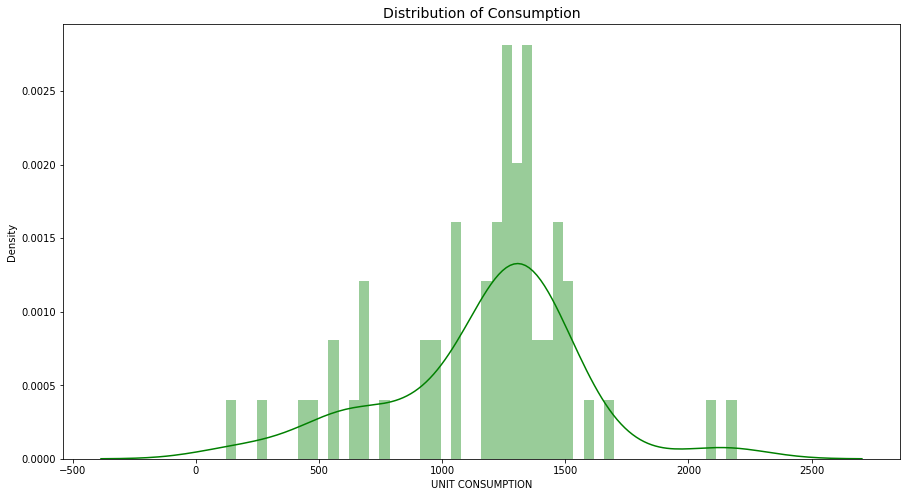

In [12]:
# Created a new figure of 15 X 8 inches
fig = plt.figure(figsize = (15, 8))
sns.distplot(a = data['UNIT CONSUMPTION'], bins = 50, color = 'green')
plt.title('Distribution of Consumption', size = 14)
plt.show()

**Observation:**

- We can observe some **positive** distribution over here.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Identification & Handling of Missing Data**

- We already saw that there **no null values** inside data.

- But can *unit consumption* be **zero**?

In [13]:
missing_frame = pd.DataFrame(index = data.columns.values)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = data[data == 0].count().values
zero_percent = data[data == 0].count().values / data.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,UNIT CONSUMPTION,READING FOR
Null Frequency,0.00000,0.00000
Missing Null %age,0.00000,0.00000
Zero Frequency,0.00000,0.00000
Missing %age,0.00000,0.00000


**Observation:**

- From above we can safely conclude that there are **no zero values** present.

<a name = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values:

In [14]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

**Before Handling Duplicate Data**

In [15]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())
print('-----------------------------------------------------------------------')
print('Contains Redundant Features?:', duplicate_cols(data))

Contains Redundant Records?: False
Duplicate Count: 0
-----------------------------------------------------------------------
Contains Redundant Features?: None


**Observation:**

- We can observe that there's **no duplicate** data present.

<a name = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

- In this section we will **identify** and **handle** the **feature** that may **contains inconsistent data type**.

**Before Identification & Handling of Inconsistent Data Types**

In [16]:
data.head(2)

,UNIT CONSUMPTION,READING FOR
2,649.40800,3/2/2021
5,1280.76800,3/1/2021


In [167]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,UNIT CONSUMPTION,READING FOR
Type,float64,datetime64[ns]


**Observation:**

- **Feature:** [ Current Data Type &rarr; Required Data Type ]
- **Month:** [ Object  &rarr; Datetime ]

**Performing Operations**

In [17]:
data['READING FOR'] = pd.to_datetime(data['READING FOR'], infer_datetime_format = True)

print('Manipulation Success!')

Manipulation Success!


**After Identification & Handling of Inconsistent Data Types**

In [18]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,UNIT CONSUMPTION,READING FOR
Type,float64,datetime64[ns]


**Observation:**

- We have successfully **handeled** *inconsistent data types*.

<a name = Section6></a>

---
# **6. Time Series Analysis**
---

- Time series deals with two columns, i.e. temporal (predictor) and forecast (prediction).

  - **Temporal:** The time which in our case is **Days**.

  - **Forecast:** The number of units i.e. **units consumption**.

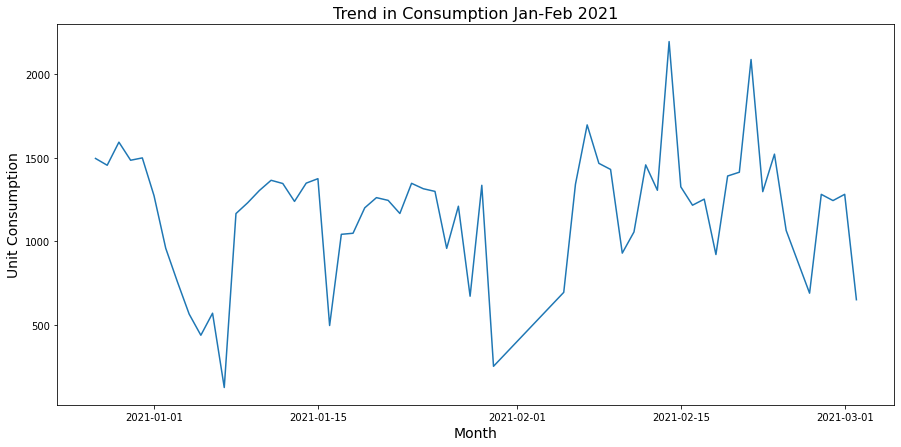

In [19]:
fig = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'READING FOR', y = 'UNIT CONSUMPTION', data = data)
plt.xlabel('Month', size = 14)
plt.ylabel('Unit Consumption', size = 14)
plt.title('Trend in Consumption Jan-Feb 2021', size = 16)
plt.show()

**Observation:**

- From the above visualization it is clear that the **data has some trend**.

- For better understanding we will try to **decompose** this **trend** into **different parts**.

- But before that we will **set** our **temporal column** as an **index**.

  - **Reason:** It will help in simplification of plotting our visualizations.

In [28]:
indexed_data =  data.set_index(['READING FOR'])
print('Success!')

Success!


In [21]:
indexed_data.head(5)

,UNIT CONSUMPTION
READING FOR,
2021-03-02,649.40800
2021-03-01,1280.76800
2021-02-28,1243.32800
2021-02-27,1280.57600
2021-02-26,688.51200


In [38]:
idx = pd.date_range('27-12-2020', '02-03-2021')
indexed_data = indexed_data.reindex(idx, fill_value=0)
print(indexed_data.index)


DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
               '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
               '2021-02-01', '2021-02-02', '2021-02-03'],
              dtype='datetime64[ns]', freq='D')


<a name = Section61></a>

## **6.1 Decomposition Of Time Series**

- It is referred  as decomposition of a time series into following components:
  - *Seasonal Component*, 
  - *Trend Component*,
  - *Cyclic Component and*,
  - *Irregular or Reisdual Component*

- These componentst are plotted separately.

- The cyclical component (if present in the data) is included in the "trend" component plot.

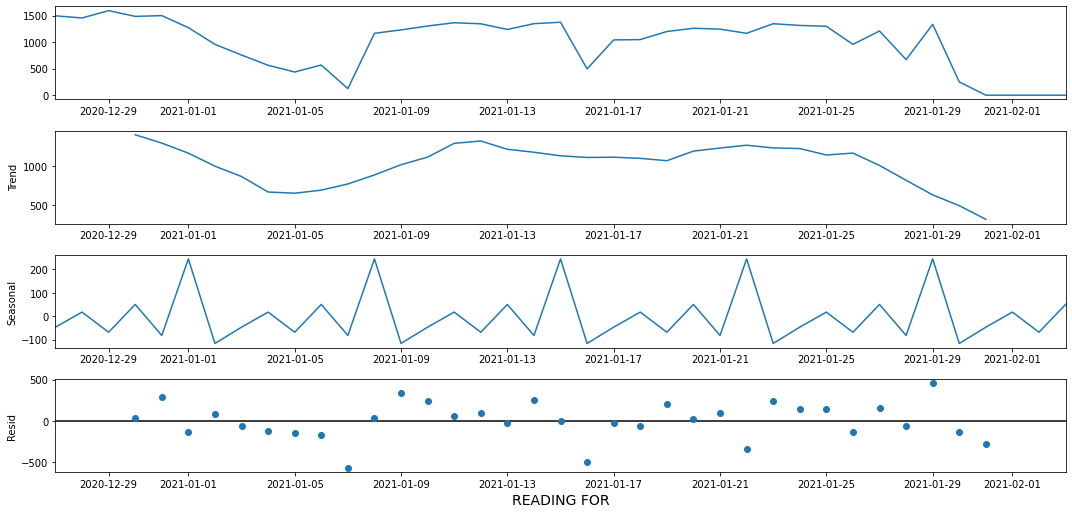

In [39]:
# Set figsize of 15 X 7 inches
rcParams['figure.figsize']  =  [15, 7]

# Decomposed data into respective components: Observed, Trend, Seasonal and Residual
seasonal_decompose(x = indexed_data, model = 'additive', extrapolate_trend = 0).plot()
plt.xlabel('READING FOR', size = 14)
plt.show()

<a name = Section62></a>

## **6.2 Analysis of Stationarity**

- We will try out two different approaches to test out whether our data is stationary or not.

- These approaches are **Rolling Statistics Test** and **Augmented Dickey-Fuller Test**.

- But before moving further we will see the difference in Stationary Time Series vs Non-Stationary Time Series

|Non - Stationary Time Series| Stationary Time Series|
|:--:|:--:|
|<img src = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/stationarity_example%201.png">|<img src = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/stationarity_example%202.png">|

<a name = Section621></a>

### **6.2.1 Rolling Statistics**

- It is also called as **moving statistics** or **rolling average** or **running average**.

- It is a **calculation** to **analyze data points** by **creating** a **series** of **average** of **different** **subsets** of the **full data set**.

- It is a **type of finite impulse response filter** with different variations such as simple, cumulative or weighted forms.

- Below we have **used** **variation** type of **"simple"** with a **window size = 12 Months**.

- You could try using 4 Month or 8 Months or so on...



In [41]:
def rolling_means(data, title_add = ''):

  # Average rolling mean over 12 months over the entire data set
  roll_mean = data.rolling(window = 12).mean()

  # Plotting Rolling Statistics over Observed Data
  roll_std = data.rolling(window = 12).std()

  sns.lineplot(x = data.index, y = 'UNIT CONSUMPTION', data = data)
  sns.lineplot(x = roll_mean.index, y = 'UNIT CONSUMPTION', data = roll_mean)
  sns.lineplot(x = roll_std.index, y = 'UNIT CONSUMPTION', data = roll_std)

  plt.legend(labels = ['Observed', 'Rolling Mean', 'Rolling Std'], loc = 'best', prop = {'size': 14})
  plt.xlabel(xlabel = 'Month', size = 14)
  plt.ylabel('Number of UNITS CONSUMPTION', size = 14)
  plt.title('Rolling Statistics (μ & σ)' + title_add, size = 16)

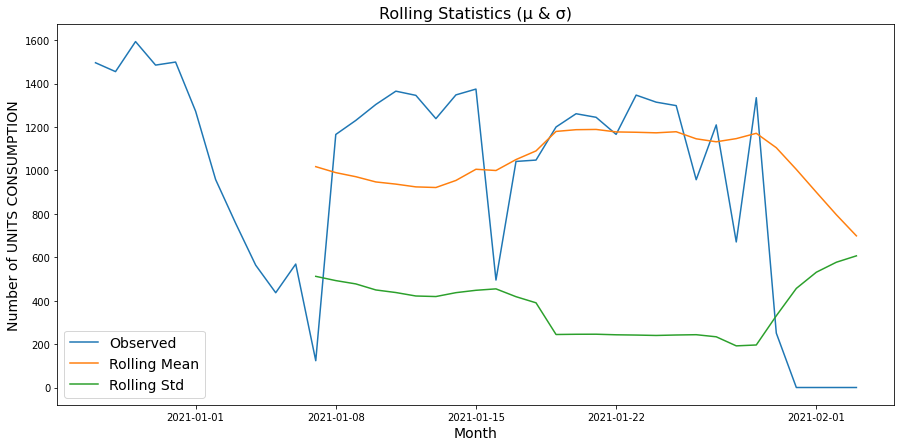

In [42]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [15, 7])

# Called the function
rolling_means(indexed_data)

# Plot the Visual
plt.show()

**Observation:**

- We can **observe a trend component** using Rolling Mean.

- On the other hand, Rolling **Standard Deviation** is fairly **constant** with time.


**Note:** 

- For our time series to be **stationary**, we need to ensure that both the **rolling statistics** remains **constant with time**.

- Thus the curves in both metrics have to be **parallel** to the **X-axis**, which in our case is not so.

- By continuing our discussion, let's try next test which is Augmented Dickey-Fuller Test.

<a name = Section622></a>

### **6.2.2 Augmented Dickey-Fuller Test**

- It tests the **null hypothesis** that a **unit root** is **present** in a **time series** sample.

- The **alternative hypothesis** is usually stationarity or **trend-stationarity**.

- The augmented Dickey–Fuller (ADF) statistic, used in the test, is a **negative** number.

- The **more negative** it is, the **stronger** the **rejection** of the hypothesis that there is a unit root at some level of confidence.

- **Note:** In our case hypothesis is as follows:

  - **Null Hypothesis ($H_o$):** Time Series Data is **not Stationary**.

  - **Alternate Hypothesis ($H_a$):** Time Series Data is **Stationary**.

- In order t*o reject the null hypothesis* our **test stats** needs to be **-ve** as much as possible.

- The *estimated test statistics* should be **less than** the *critical value (5%)*.

- Our estimated values at confidence intervals should be close to the ADF Test Statistics as much as possible.

<br> 
- **Example:**

  - Test Statistics comes out to be **0.456** and the 5% critical value is **0.558**
  
  - Then we reject the $H_o$.

In [43]:
def ADFTest(data, test_label = 'Original'):

  # Saved test results from adfuller function
  dftest = adfuller(data['UNIT CONSUMPTION'], autolag = 'AIC')

  # Extracted respective values from the saved test results
  df_dict = {'ADF_Test_Statistics': dftest[0], 'p-value': dftest[1], 'Used_Lags': dftest[2], 
              'Number_Of_Observations': dftest[3], 'Critical_Value (1%)': dftest[4]['1%'],
            'Critical_Value (5%)': dftest[4]['5%'], 'Critical_Value (10%)': dftest[4]['10%']}

  # Created dataframe out of the dictionary
  dfoutput = pd.DataFrame(data = df_dict, index = [test_label])

  return dfoutput

In [44]:
ADFTest(indexed_data)

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


**Observation:**

- **p-value** is **larger** than 0.01, 0.1 and 0.5.

- Critical values are **nowhere close** to the ADF Test Statistics.

- Hence, we **accept** our **Null Hypothesis** that our time series data is **not stationary**.

<a name = Section63></a>

## **6.3 Data Transformations**

- In this section we will look out for different data transformations to achieve stationarity.

- The **transformations** that we will try are as follows:

  - *Log Scaled*
  - *Log Scaled Moving Average*
  - *Exponential Decay*
  - *Time Shift*

- Apart from the given above transformations there are many more...

- **Example:** In this notebook we will use shift tranformation and it works as shown below:

<br> 



<a name = Section631></a>

### **6.3.1 Log Scaled Transformation**

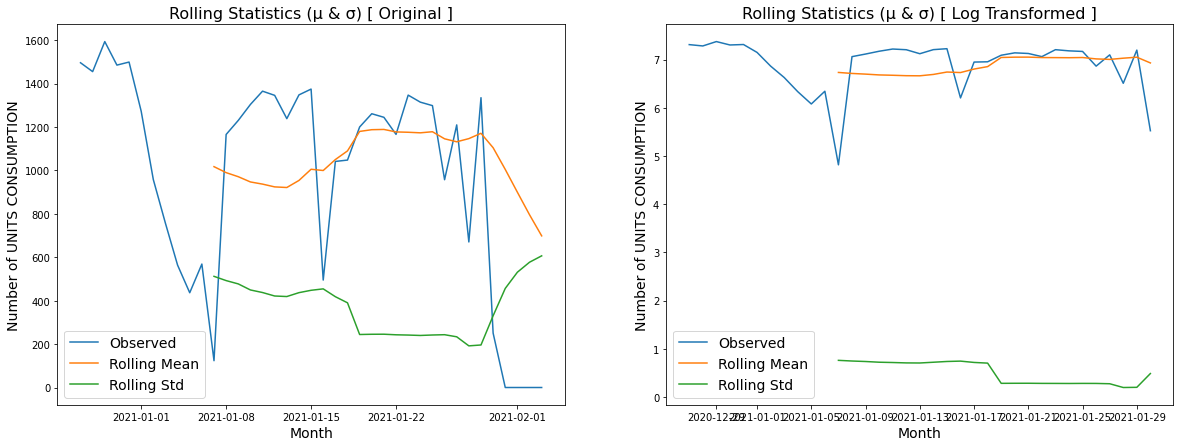

In [45]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)

# Plot Without Transformation
rolling_means(indexed_data, title_add = ' [ Original ]')

plt.subplot(1, 2, 2)

# Applied Log Transformation
log_indexed_data = np.log(indexed_data)

# Plot With Log Transformation
rolling_means(log_indexed_data, title_add = ' [ Log Transformed ]')

# Plot the Visual
plt.show()

In [48]:
ADFTest(indexed_data, test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


In [89]:
ADFTest(log_indexed_data, test_label = 'Log Transformed')

MissingDataError: ignored

**Observations:**

- From the above graph (log transformed) it is clearly visible that rolling mean is **not stationary** but better than original one.

- This time our `test statistics` is **negative** but `p-value` is still **greater** than 0.01, 0.05 and 0.1.

- Our Critical values are also far away from Test Statistics.

- Let's try another transformation which is called as Log Scaled Moving Average.

<a name = Section632></a>

### **6.3.2 Log Scaled Moving Average Transformation**

- From the previous visualizations we found that even the log transformed time series has a trend component.

- Thus, if we somehow **remove** the **trend** component from the time series data maybe it will lead us to reach the stationarity.


- **Formula:** $ LogScaledMovingAverage  =  Log(TimeSeries) - Moving Average(Log(TimeSeries))$

- Remember we are taking **average of 12 months**, which in results will *generate NAN in first 11 values*, which needs to be removed.

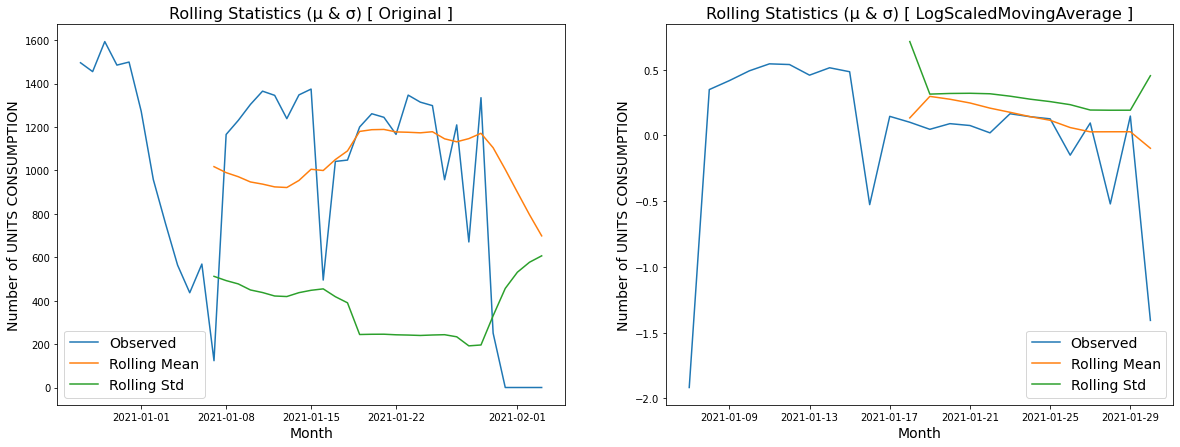

In [51]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)

# Plot Without Transformation
rolling_means(indexed_data, title_add = ' [ Original ]')

plt.subplot(1, 2, 2)

# Apply Log Scaled Moving Average Transformation
log_indexed_data = np.log(indexed_data)
moving_average_log_indexed_data = log_indexed_data.rolling(window = 12).mean()
log_scaled_moving_average = log_indexed_data - moving_average_log_indexed_data

# Remove NAN values
log_scaled_moving_average.dropna(inplace = True)

# Plot With Log Transformation
rolling_means(log_scaled_moving_average, title_add = ' [ LogScaledMovingAverage ]')

# Plot the Visual
plt.show()

In [52]:
ADFTest(indexed_data, test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


In [53]:
ADFTest(log_scaled_moving_average, test_label = 'LSMA Transformed')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
LSMA Transformed,3.01137,1.00000,9,14,-4.01203,-3.10418,-2.69099


**Observation:**

- Our p-value has gone to **1.0** from 0.7 which is quite less than 0.05 and 0.1 but not 0.01 but that's okay.

- The critical values at 1% and 5% confidence intervals are pretty close to the Test Statistic but not to 10%.

- Even though we have achieved better results, let's try Exponential Decay transformation.

<a name = Section633></a>

### **6.3.3 Exponential Weighted Average Transformation**

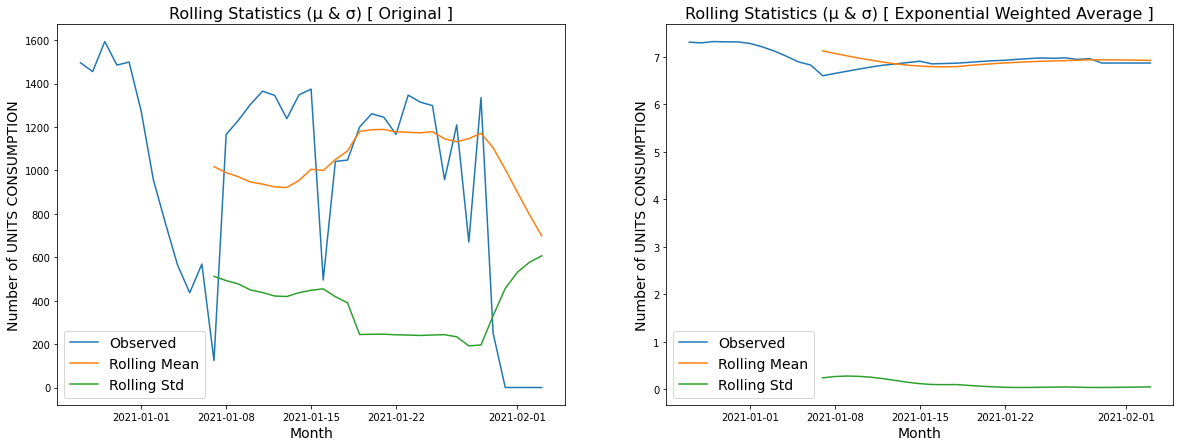

In [54]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)

# Plot Without Transformation
rolling_means(indexed_data, title_add = ' [ Original ]')

plt.subplot(1, 2, 2)

# Apply Exponential Weight Transformation
exp_weighted_avg_indexed_data = log_indexed_data.ewm(halflife = 12, min_periods = 0, adjust = True).mean()

# Plot With Log Transformation
rolling_means(exp_weighted_avg_indexed_data, title_add = ' [ Exponential Weighted Average ]')

# Plot the Visual
plt.show()

In [55]:
ADFTest(indexed_data, test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


In [56]:
ADFTest(exp_weighted_avg_indexed_data, test_label = 'EWA Transformed')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
EWA Transformed,-3.42379,0.01017,3,35,-3.63274,-2.94851,-2.61302


**Observation:**

- Our p-value has reduced to **0.01** from 0.7 which is still more than 0.01, 0.05 and 0.1.

- The critical values at 5% and 10% confidence intervals are close to the Test Statistic, but not to 1%.

- This transformation didn't performed well with respect to Log Scaled Moving Average Transformation.

- But we can make an improvement over this transformation which we will perform in next transformation.

<a name = Section634></a>

### **6.3.4 Log Scaled Exponential Weighted Average Transformation**

- From the previous visualizations we found that the trend component is still present.

- Thus, if we somehow remove the trend component from the time series data maybe it will lead us to reach the stationarity.

- **Formula:**

  $LogScaledExponentialWeightedAverage$
  
  $ = Log(TimeSeries) - ExponentialWeightedAverage(Log(TimeSeries))$

- Remember we are taking average of 12 months, which in results will generate NAN in first 11 values, which needs to be removed.

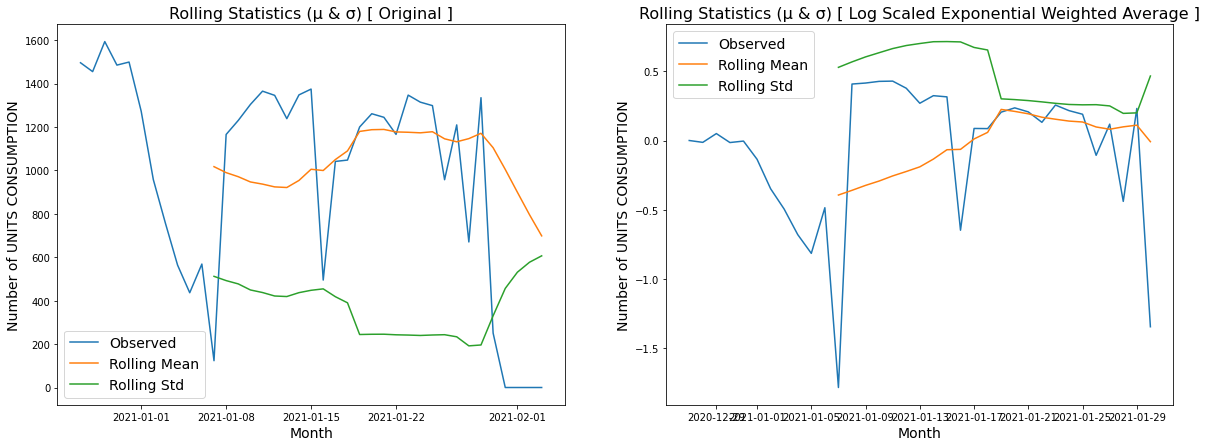

In [57]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)

# Plot Without Transformation
rolling_means(indexed_data, title_add = ' [ Original ]')

plt.subplot(1, 2, 2)

# Apply Log Scaled Moving Average Transformation
log_indexed_data = np.log(indexed_data)
exp_weighted_avg_indexed_data = log_indexed_data.ewm(halflife = 12).mean()
log_scaled_exp_indexed_data = log_indexed_data - exp_weighted_avg_indexed_data

# Plot With Log Transformation
rolling_means(log_scaled_exp_indexed_data, title_add = ' [ Log Scaled Exponential Weighted Average ]')

# Plot the Visual
plt.show()

In [58]:
ADFTest(indexed_data, test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


In [59]:
ADFTest(log_scaled_exp_indexed_data, test_label = 'EWA Transformed')

MissingDataError: ignored

**Observation:**

- Our p-value has reduced to **0.005** from 0.9 which is less than 0.01, 0.05 but more than 0.1.

- The critical values at 1% confidence intervals are close to the Test Statistic but not to 5% and 10%.

- But our current transformation is better than the logarithmic transformation.

- Even though, we couldn't observe any differences visually but the tests confirmed exponential weighted to be much better.

- Lets try one more technique & observe if we could achieve better results.

<a name = Section635></a>

### **6.3.5 Time Shift Transformation**

- This is a differencing technique which takes the differece with a particular time lag.

- It can help **stabilise** the **mean** of a time series by removing changes in the level of a time series.

- Therefore, **eliminates** (or reduces) **trend** and **seasonality**.

- Given a set of observation on the time series:

  - $x_{0}, x_{1}, x_{2}, x_{3}, .... x_{n}$

- Thus, the time series with time shifted values are:

  - $ null, (x_{1} - x_{0}), (x_{2} - x_{1}), (x_{3} - x_{2}), (x_{4} - x_{3}),.... (x_{n} - x_{n-1}) $

- The differencing value (d) that we have chosen is 1 which we will use in ARIMA model.

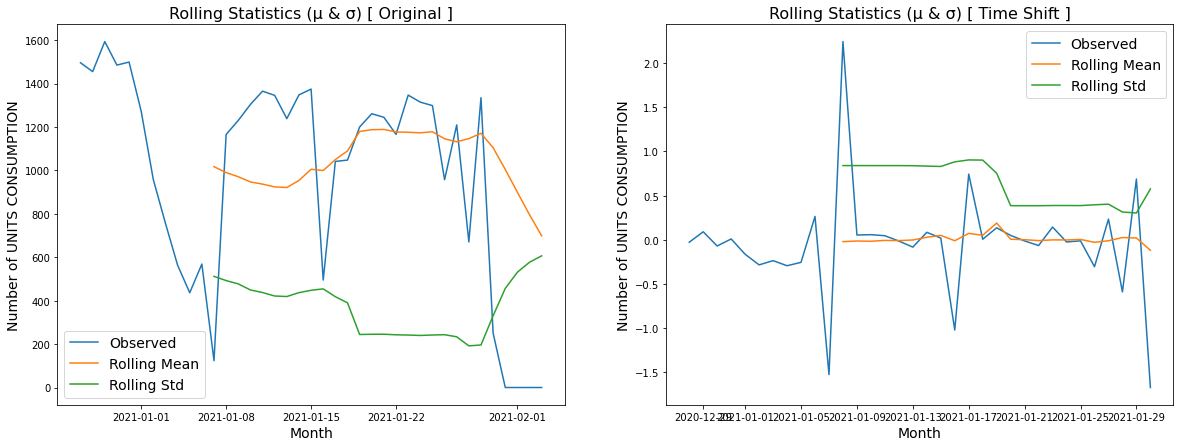

In [60]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)

# Plot Without Transformation
rolling_means(indexed_data, title_add = ' [ Original ]')

plt.subplot(1, 2, 2)

# Apply Log Scaled Moving Average Transformation
log_indexed_data = np.log(indexed_data)
shift_indexed_data  =  log_indexed_data - log_indexed_data.shift(periods = 1)

# Remove NAN values
shift_indexed_data.dropna(inplace = True)

# Plot With Log Transformation
rolling_means(shift_indexed_data, title_add = ' [ Time Shift ]')

# Plot the Visual
plt.show()

In [61]:
ADFTest(indexed_data, test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-1.11364,0.70960,1,37,-3.62092,-2.94354,-2.61040


In [62]:
ADFTest(shift_indexed_data, test_label = 'Time Shift Transformed')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Time Shift Transformed,nan,nan,0,34,-3.63922,-2.95123,-2.61445


**Observation:**

- Our p-value has reduced to **0.007** from 0.9 which is less than 0.01, 0.05 but more than 0.1.

- The critical values at 5%, 10% confidence intervals are coming close to the Test Statistic but not to 1%.

- Let's stick to the time shift transfomrmation because:

  - It is a very **popular** technique,

  - It is relatively easy to add noise and seasonality back into predicted residuals.

<a name = Section7></a>

---
# **7. Time Series Forecasting**
---

- Now before diving into model development, we need to perform some statistical analysis.

- We will be using ARIMA models, but they requires some important parameters which are as follows:


- **Number of AR (Auto-Regressive) terms ($p$):** 

  - AR terms are just **lags** of *dependent variable*. 

  - For instance if $p$ is 5, the predictors for $x(t)$ will be $x(t - 1)….x(t - 5)$.
  
  - Difficult & Estimated through Visual Analysis.

  - Estimated through **Partial Auto Correlation Function**.

- **Number of MA (Moving Average) terms ($q$):** 
  
  - MA terms are **lagged forecast errors** in *prediction equation*. 

  - For instance if $q$ is $5$, the predictors for $x(t)$ will be $e(t - 1)….e(t - 5)$. 

  - $e(i)$ is the difference between the moving average at ith instant and actual value.

  - Difficult & Estimated through Visual Analysis.

  - Estimated through **Auto Correlation Function**.

- **Number of Differences ($d$):**  

  - The $d$ represents the **difference** of *current from previous value* to **remove** the **trend** out of the data.

  - These are the **number of non-seasonal differences**, i.e. in this case we took the *first order difference*.

<a name = Section71></a>

## **7.1 Auto Correlation & Partial Auto Correlation**

- **Auto Correlation (or Serial Correlation):** 

  - Statistical Correlation (Pearson) summarizes the **strength** of the **relationship** (-1, +1) between two variables.

  - Similarly, we use **time lags** to calculate correlation for time series observations with observations at previous times.

  - A plot of the *autocorrelation of a time series by lag* is called the **AutoCorrelation Function**, also called as **Correlogram**.

  - **Example:** At lag 5, ACF would compare series at time instant $t_{1} … t_{2}$ with series at instant $(t_{1} - 5)…(t_{2} - 5)$.

<br> 
- **Partial Auto Correlation:** 

  - It is a summary of the **relationship** between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

  - It generally depends on the **shock** (ε) of the variation on given day.

  - **Example:** At lag 5, PACF will check the correlation but remove the effects already explained by lags 1 to 4.

In [65]:
# Estimating Autocorrelation Function
ACF = acf(shift_indexed_data, nlags = 16)

# Estimating Partial Autocorrelation Function
PACF = pacf(shift_indexed_data, nlags = 16)

# Preparing a dataframe out of Correlation Arrays
corrFrame = pd.DataFrame(data = {'ACF': ACF, 'PACF': PACF})

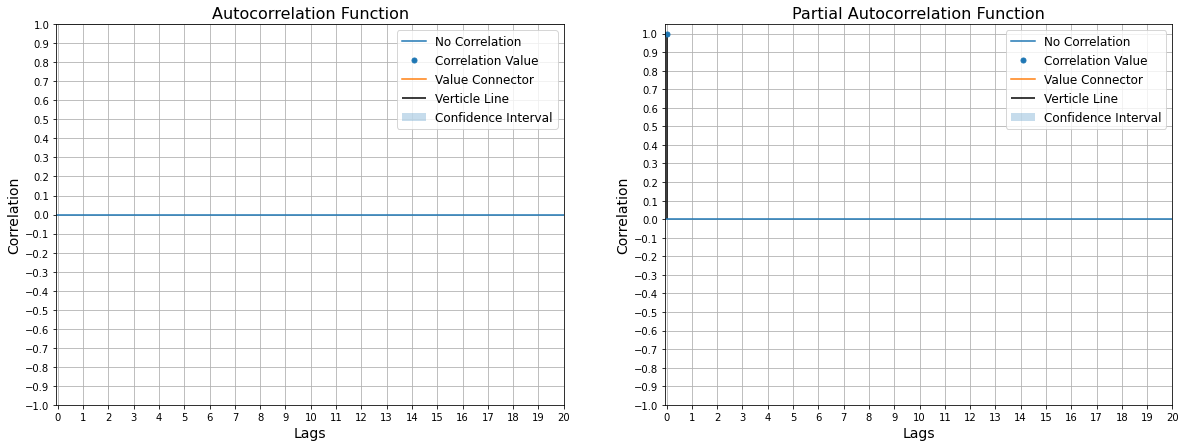

In [68]:
fig, (axes1, axes2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (20, 7))

plot_acf(shift_indexed_data, lags = 16, ax = axes1)
sns.lineplot(x = corrFrame.index, y = 'ACF', data = corrFrame, ax = axes1)
axes1.set_xlabel(xlabel = 'Lags', size = 14)
axes1.set_ylabel(ylabel = 'Correlation', size = 14)
axes1.set_title(label = 'Autocorrelation Function', size = 16)
axes1.legend(labels = ['No Correlation', 'Correlation Value', 'Value Connector','Verticle Line', 'Confidence Interval'], prop = {'size': 12})
axes1.set_xticks(ticks = range(0, 21, 1))
axes1.set_yticks(ticks = np.linspace(start = -1, stop = 1, num = 21))
axes1.grid(b = True, which = 'both')

plot_pacf(shift_indexed_data, lags = 16, ax = axes2)
sns.lineplot(x = corrFrame.index, y = 'PACF', data = corrFrame, ax = axes2)
axes2.set_xlabel(xlabel = 'Lags', size = 14)
axes2.set_ylabel(ylabel = 'Correlation', size = 14)
axes2.set_title(label = 'Partial Autocorrelation Function', size = 16)
axes2.legend(labels = ['No Correlation', 'Correlation Value', 'Value Connector', 'Verticle Line', 'Confidence Interval'], prop = {'size': 12})
axes2.set_xticks(ticks = range(0, 21, 1))
axes2.set_yticks(ticks = np.linspace(start = -1, stop = 1, num = 21))
axes2.grid(b = True, which = 'both')

plt.show()

**Observation:**

- **ACF Graph:** Shows Value Connector is touching the baseline with Lags being close to 2. 

  - Thus, value for $q$ = **2**.

- **PACF Graph:** Shows Value Connector is touching the baseline with Lags being close to 2.

  - Thus, value for $p$ = **2**.

<a name = Section72></a>

## **7.2 Data Preparation**

- Before diving in Model Development we must **split** our **data** into training part and testing part.

- Our transformed data has a shape of **143 x 1**.

- Let's split the data into 92:08 ratio i.e. **92%** for *training* and **8%** (12 Months) for *testing*.

In [69]:
train = shift_indexed_data[0 : len(shift_indexed_data) - 7]

test = shift_indexed_data[len(shift_indexed_data) - 7 : ]

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (28, 1)
Test Shape: (7, 1)


<a name = Section73></a>

## **7.3 Model Development**

- In this section we will develop several models of time series such as:

  - **Auto Regressive** (AR) Model

  - **Auto Regressive Moving Average** (ARMA) Model

  - **Auto Regressive Integrated Moving Average** (ARIMA) Model

- To evaluate the model performance we have created a custom function to check the deviation in actual and predicted values.

- As far as the **evaluation metric** is concerned we will be using **Residual Sum of Squares (RSS)**.

- **Lower** the **RSS** **better** is the **model** in **prediction**.

In [70]:
def actual_vs_predicted(actual_data, predicted_data, title):

  # Plotting Actual Data
  sns.lineplot(x = actual_data.index, y = actual_data.values.flatten())
  sns.scatterplot(x = actual_data.index, y = actual_data.values.flatten())

  # Plotting Predicted Data
  sns.lineplot(x = predicted_data.index, y = predicted_data.values)
  sns.scatterplot(x = predicted_data.index, y = predicted_data.values)

  # Estimating RSS
  rss_value = np.sum(np.square(actual_data.values - predicted_data.values))

  # Modifying formatting
  plt.xlabel(xlabel = 'Month', size = 14)
  plt.ylabel(ylabel = 'Number of Units', size = 14)
  plt.title(label = title +' [RSS = {:.4f}]'.format(rss_value), size = 16)
  plt.legend(labels = ['Actual', 'Predicted'])
  plt.grid(b = True, which = 'both')

<a name = Section731></a>

### **7.3.1 Auto Regressive Model**

- We will use ARIMA model but **without passing** the $q$ value inside order of the function.

- The **differencing** (I) that we are using is **1**.

- Let's train the model and predict the results.

In [71]:
model = ARIMA(train, order = (2, 1, 0))
model_fit = model.fit()
predicted = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ar.L1    -1.00219
ar.L2    -0.45215
sigma2    0.39916
dtype: float64
-----------------------------------------------------------------------


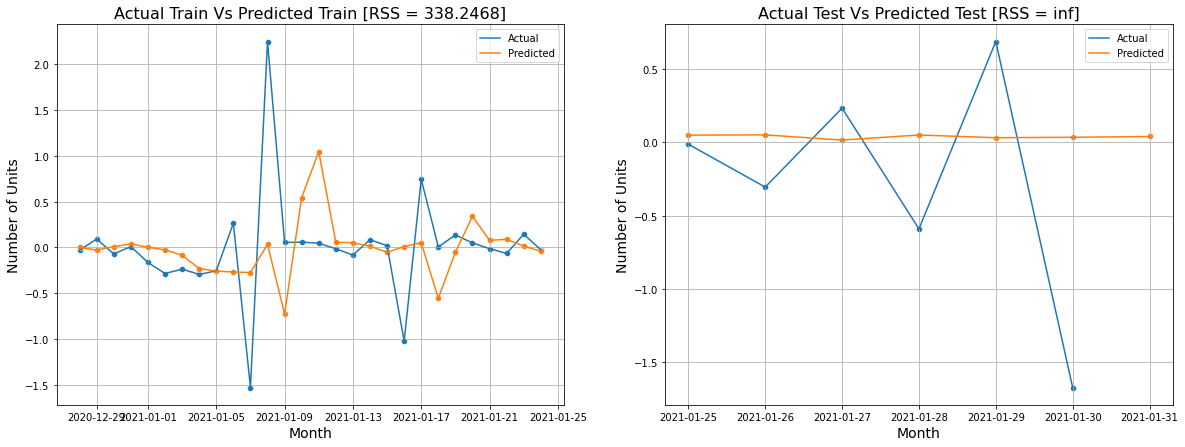

In [72]:
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title = 'Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title = 'Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- We can observer **RSS** = **249** on train set while on test set it is around **1**.

- Let's try Moving Averate model and see how it is performing.

<a name = Section732></a>

### **7.3.2 Moving Average Model**

- We will use ARIMA model but **without passing** the $p$ value inside order of the function.

- The **differencing** (I) that we are using is **1**.

- Let's train the model and predict the results.

In [73]:
model = ARIMA(train, order = (0, 1, 2))
model_fit = model.fit()
predicted = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ma.L1    -1.41382
ma.L2     0.41454
sigma2    0.27812
dtype: float64
-----------------------------------------------------------------------


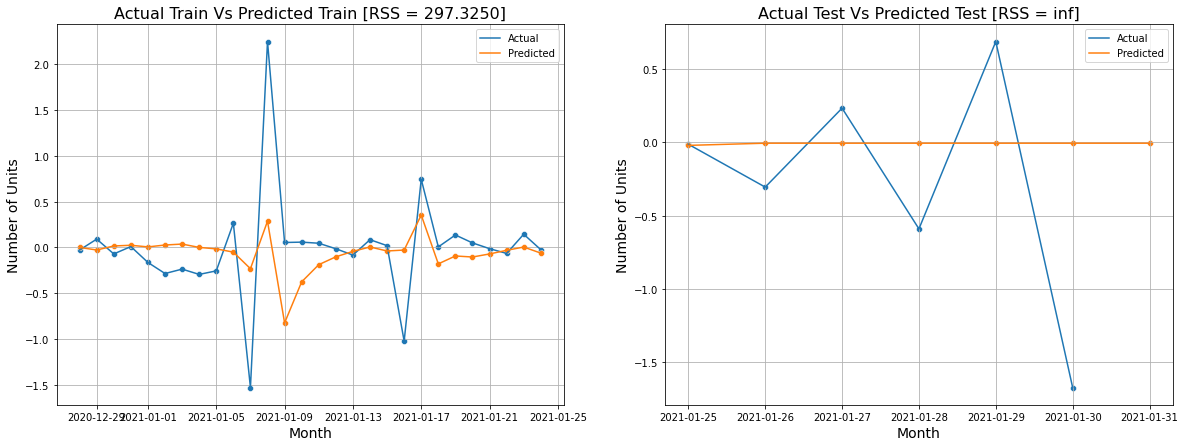

In [74]:
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title = 'Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title = 'Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- We can observer **RSS** = **219** on train set while on test set it is around **0.84**.

- Let's try Auto Regressive Moving Averate model in combination and see how it is performing.

<a name = Section733></a>

### **7.3.3 Auto Regressive Moving Average Model**

- This time we will use ARMA model directly **without passing** the **differencing** term to check the model behaviour.

- Let's train the model and predict the results.

In [75]:
model = ARIMA(train, order = (2, 0, 2))
model_fit = model.fit()
predicted = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)

print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
const     0.00123
ar.L1     0.31000
ar.L2     0.27608
ma.L1    -0.95086
ma.L2    -0.04897
sigma2    0.22815
dtype: float64
-----------------------------------------------------------------------


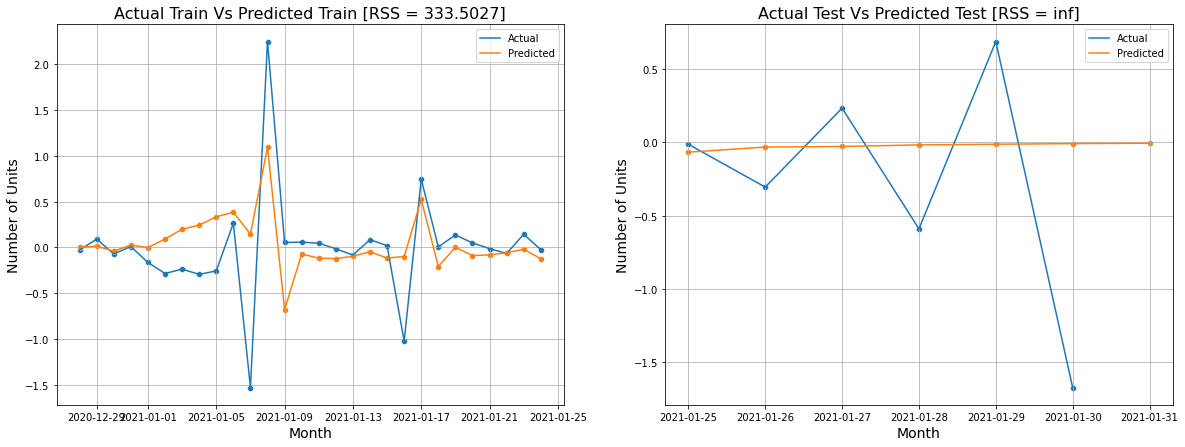

In [76]:
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title = 'Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title = 'Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- We can observer **RSS** = **255** on train set while on test set it is around **0.85**.

- Let's try ARIMA and see how it is performing.

<a name = Section734></a>

### **7.3.4 Auto Regressive Integrated Moving Average Model**

- We will use ARIMA model and pass the p, d and q values identified from earlier analysis.

- **Note:** Here $p = 2, d = 1, q = 2$

- Let's train the model and predict the results.

In [77]:
model = ARIMA(train, order = (2, 1, 2))
model_fit = model.fit()
predicted = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print('%s' % model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ar.L1    -1.39101
ar.L2    -0.44495
ma.L1    -0.00061
ma.L2    -0.99939
sigma2    0.26242
dtype: float64
-----------------------------------------------------------------------


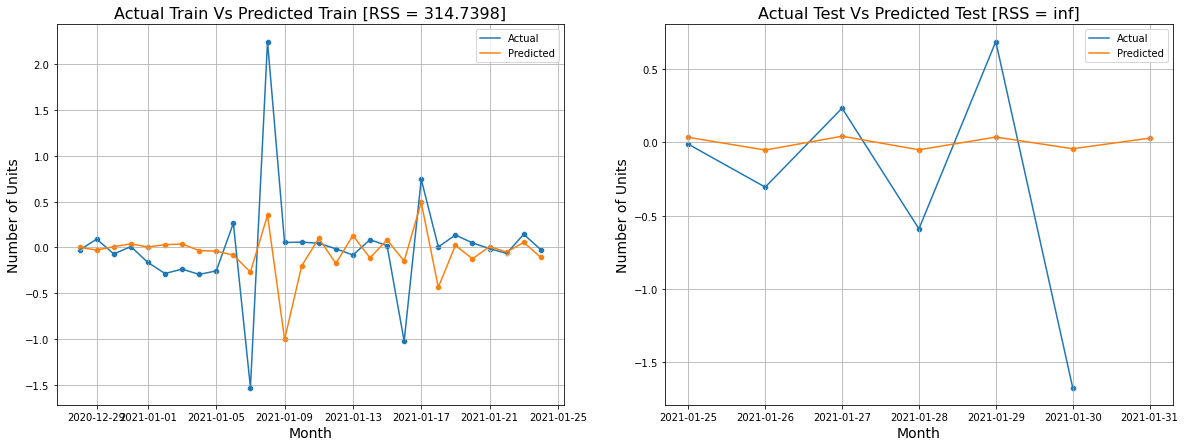

In [78]:
figure = plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title = 'Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title = 'Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- We can observer that ARIMA is performing **better** than simple ARMA model as RSS on test set is much lower.

- So we will finalize this model and this time we will train our model using entire data and compare it wiht original data.

In [79]:
# Training ARIMA with completed shift transformed data
model = ARIMA(shift_indexed_data, order = (2, 1, 2))
model_fit = model.fit()
model_fit.fittedvalues.shape

LinAlgError: ignored

<a name = Section735></a>

### **7.3.5 Reverse Transformation & Prediction Analysis**

- In this section we will perform **reverse transformation** over the predicted values and observe the behaviour.

- We will analyze how well it performs at the **original scale**.

- **Working:** Earlier we transformed the actual data which looked something like:

<br> 


<br> 
- Then we passed this transformed data (**Log(P)-Shift(Log(P))**) to ARIMA which in result gave the predictions.

- Now to **inverse** the transformation over predictions, firstly, we will *copy the first row of original data* to a new dataframe.

- Then we will add this column to **cumulative sum** of fitted values (predictions) to *reverse the shift transformation*.

- Finally we will perform **exponential** transformation over the data *to remove log transformation*.

<br> 


In [80]:
model_fit.fittedvalues.cumsum().head()

2020-12-28    0.00000
2020-12-29   -0.02768
2020-12-30   -0.01927
2020-12-31    0.01954
2021-01-01    0.02452
Freq: D, dtype: float64

**Observation:**

- Did you noticed that date start from `1949-02-01` and not the first month i.e. `1949-01-01`?

- The reason being we took **lag of one month** while differencing to remove the trend part.

- We will take **cummulative sum** of all the values and **add** the **first month value** resulting in the original values.

In [84]:
reverse_diff_data = pd.DataFrame(data = log_indexed_data['UNIT CONSUMPTION'][0], index = log_indexed_data.index, columns = ['UNIT CONSUMPTION'])

# Adding first month value to each row
reverse_diff_data['UNIT CONSUMPTION'] = reverse_diff_data['UNIT CONSUMPTION'] + model_fit.fittedvalues.cumsum()

# Adding the fist month back to complete the reverse differncing 
reverse_diff_data.iloc[0] = log_indexed_data['UNIT CONSUMPTION'][0]

# View the reversed differenced data
reverse_diff_data.head()

,UNIT CONSUMPTION
2020-12-27,7.31038
2020-12-28,7.31038
2020-12-29,7.28270
2020-12-30,7.29111
2020-12-31,7.32991


**Observation:**

- Now that we have added the trend component part back to the data, we need to **transform** the **log scale**.

- To perform **inverse scaling** we will perform **exponential transformation**.

In [85]:
inverse_log_data = np.exp(reverse_diff_data)
inverse_log_data.head()

,UNIT CONSUMPTION
2020-12-27,1495.74400
2020-12-28,1495.74400
2020-12-29,1454.91203
2020-12-30,1467.20352
2020-12-31,1525.25087


In [90]:
figure = plt.figure(figsize = [15, 7])

sns.lineplot(x = indexed_data.index, y = 'UNIT CONSUMPTION', data = data)
sns.lineplot(x = inverse_log_data.index, y = 'UNIT CONSUMPTION', data = inverse_log_data)
plt.xlabel('READING FOR', size = 14)
plt.ylabel('Number of Units', size = 14)
plt.title(label = 'Actual Data Vs Predicted Data', size = 16)
plt.legend(labels = ['Actual Data', 'Predicted Data'], prop = {'size': 12})
plt.grid(b = True, which = 'both')
plt.show()

ValueError: ignored

<Figure size 1080x504 with 0 Axes>

**Observation:**

- We see that our **predicted forecasts** are **very close** to the real time series values indicating a fairly **accurate** model.

<a name = Section8></a>

---
# **8. Conclusion**
---

- We studied in depth about the data, its characteristics, **components** and its **distribution**.

- We performed stationarity test using **Rolling Statistics** and **Augmented Dickey-Fuller Test**.

- We applied various **transformations** to make our data **stationary** and finalized **Time Shift Transformation**.

- Then we used **Auto Correlation** & **Partial Auto Correlation** functions to estimate Auto Regressive and Moving Average parameters.

- We finalized **ARIMA** model because it gave us the best results with **lowest RSS** value.

- Then we **inversed** our **prediction** to **original scale** to analyze the trend with original data.

- We found that the **predictions** are **pretty close** to the original data.